<a href="https://colab.research.google.com/github/HemaGarima/Machine-Learning/blob/master/NLP_C1_w1_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

## Setup

In [1]:
import nltk # Python Library for NLP , full form is Natural Language Toolkit

In [2]:
from nltk.corpus import twitter_samples

In [3]:
import matplotlib.pyplot as plt

In [4]:
import random

## About the twitter dataset

In [5]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [6]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [7]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

Number of positive tweets:  5000
Number of negative tweets:  5000


In [8]:
print('The type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of all_negative_tweets is: ', type(all_negative_tweets))

The type of all_positive_tweets is:  <class 'list'>
The type of all_negative_tweets is:  <class 'list'>


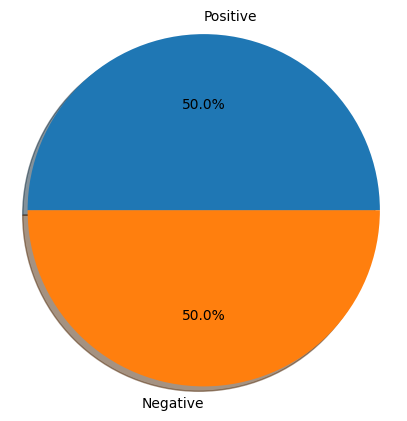

In [9]:
fig = plt.figure(figsize = (5,5))
labels = 'Positive' , 'Negative'
sizes = [len(all_positive_tweets) , len(all_negative_tweets)]
plt.pie(sizes , labels = labels , autopct = '%1.1f%%',shadow = True , startangle = 0)
plt.axis('equal')
plt.show()

## Looking at raw texts

In [10]:
print('\033[92m' + all_positive_tweets[random.randint(0,5000)]) # print positive in green
print('\033[91m' + all_negative_tweets[random.randint(0,5000)]) # print negative in red

@mediatemple I'd love you to add my @mediatemple hosted site to your blog :) Please. All about my drone videos etc http://t.co/R6B1MIutgJ
why isn't anyone awake :-((


## Preprocess raw text for sentiment analysis

In [11]:
all_positive_tweets[2277]

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

In [12]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [13]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
import re # Library for regular expression operations
import string # for string operations
from nltk.corpus import stopwords # module for stop words that come with NLTK
from nltk.stem import PorterStemmer # module form stemming
from nltk.tokenize import TweetTokenizer # module for tokenizing strings

## Remove hyperlinks , Twitter marks and styles

In [15]:
print('\033[92m' + tweet)
print('\033[94m')

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i



In [16]:
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+','',tweet)

In [17]:
# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+','',tweet2)

In [18]:
# remove hashtags
# only removing the hast # sign from the word
tweet2 = re.sub(r'#' , '',tweet2)

In [19]:
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [20]:
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


## Tokenize the string
- split the strings into individual words without blanks or tabs.
- convert each word in the string to lower case.

In [21]:
print()

In [22]:
print('\033[092m' + tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [23]:
print('\033[94m')

In [24]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case = False , strip_handles = True , reduce_len = True)

In [25]:
# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

In [26]:
print()
print('Tokenized string:')
print(tweet_tokens)


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


## Remove stop words and punctuations
- stop words are words that don't add significant meaning to the text

In [27]:
# import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

In [28]:
print('Stop words\n')
print(stopwords_english)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [29]:
print(len(stopwords_english))

179


In [30]:
print('\nPunctuation\n')
print(string.punctuation)


Punctuation

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')
tweets_clean = []



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']



In [32]:
for word in tweet_tokens: # Go through every word in your tokens list
  if(word not in stopwords_english and word not in string.punctuation):
    tweets_clean.append(word)

In [33]:
print('removed stop words and punctuation:')
print(tweets_clean)

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


## Stemming
- it is the process of converting a word to its most general form or stem


In [34]:
print(tweets_clean)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [35]:
# instantiate stemming class
stemmer = PorterStemmer()

In [36]:
# Create an empty list to store the stems
tweets_stem = []

In [37]:
for word in tweets_clean:
  stem_word = stemmer.stem(word)
  tweets_stem.append(stem_word)

In [38]:
print('stemmed words:')
print(tweets_stem)

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


## Process_tweet()

In [39]:
from utils import process_tweet

In [46]:
tweet = all_positive_tweets[2277]

In [47]:
print()
print('\033[92m')
print(tweet)
print('\033[94m')



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i



In [48]:
# call the imported function
tweets_stem = process_tweet(tweet);

In [49]:
print('preprocessed tweet:')
print(tweets_stem)

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
